# KNN Traning

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris



import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor


In [80]:
models = [
    {
        "name": "KNN",
        "model": KNeighborsRegressor(n_neighbors=10)
    },
    {
        "name": "Linear Regression",
        "model": LinearRegression()
    },
    # {
    #     "name": "Random Forest",
    #     "model": RandomForestRegressor(n_estimators=100)
    # },
    # {
    #     "name": "Decision Tree",
    #     "model": DecisionTreeRegressor()
    # },
   {     "name": "XGBoost",
        "model": XGBRegressor(
        n_estimators=300,       # number of trees
        learning_rate=0.05,     # smaller = slower but more accurate
        max_depth=6,            # tree depth
        subsample=0.8,          # use 80% of data per tree
        colsample_bytree=0.8,   # use 80% of features per tree
        random_state=42
        )
    },
    { 'name': 'LightGBM', 'model': LGBMRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ) },
]

results = []





In [58]:
# Load datasets from pickle file
from pickle import load
datasets = load(open('datasets.pkl', 'rb'))

In [79]:
# Evaluate each model on the dataset
for dataset in datasets:
    X_train = dataset["X_train"]
    X_test = dataset["X_test"]
    y_train = dataset["y_train"]
    y_test = dataset["y_test"]

    for model in models:
        model_name = model["name"]
        # answer = input(f"Do you want to run {model_name} on {dataset['name']} dataset? (y/n): ")
        # if answer.lower() != 'y':
        #     continue
        model_instance = model["model"]
        model_instance.fit(X_train, y_train)
        y_pred = model_instance.predict(X_test)
        r2_score_value = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        results.append({
            "model": model_name,
            "dataset": dataset["name"],
            "R2 score": r2_score_value,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2633
[LightGBM] [Info] Number of data points in the train set: 186180, number of used features: 52
[LightGBM] [Info] Start training from score 41.128429


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:39:53] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2632
[LightGBM] [Info] Number of data points in the train set: 186180, number of used features: 52
[LightGBM] [Info] Start training from score 41.128429


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:41:26] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2633
[LightGBM] [Info] Number of data points in the train set: 186180, number of used features: 52
[LightGBM] [Info] Start training from score 41.128429


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:43:00] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,model,dataset,R2 score,MAE,MSE,RMSE
0,KNN,with robust,0.678407,7.846452,107.078005,10.347850
1,Linear Regression,with robust,0.723390,7.262221,92.100419,9.596896
2,XGBoost,with robust,0.737158,7.097007,87.516214,9.355010
3,LightGBM,with robust,0.735873,7.114766,87.944301,9.377862
4,XGBoost_Class,with robust,0.545436,8.489011,151.352218,12.302529
5,KNN,with minmax,0.707818,7.512495,97.285239,9.863328
6,Linear Regression,with minmax,0.723390,7.262221,92.100419,9.596896
7,XGBoost,with minmax,0.737158,7.097007,87.516214,9.355010
8,LightGBM,with minmax,0.736259,7.110344,87.815738,9.371005
9,XGBoost_Class,with minmax,0.545436,8.489011,151.352218,12.302529


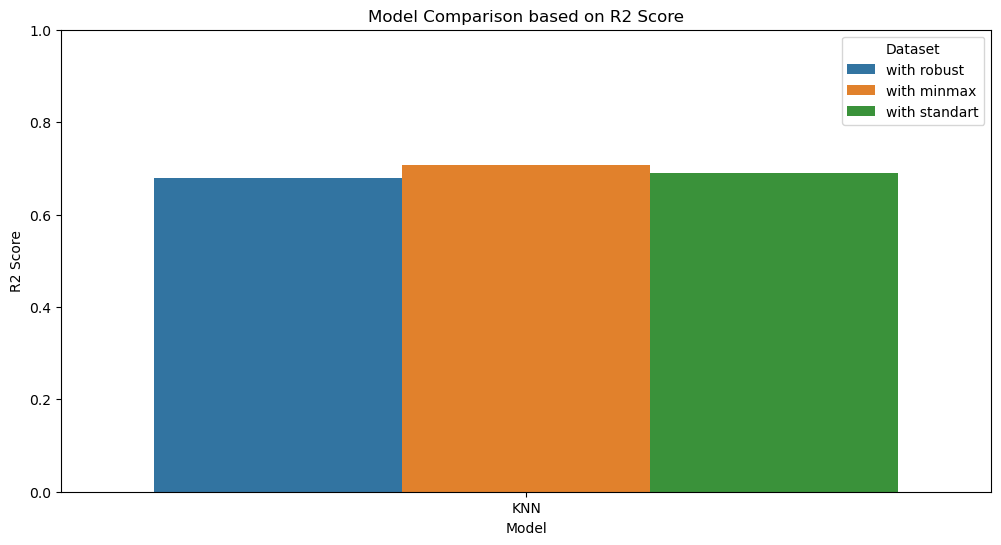

In [ ]:
# draw a graph to compare the models based on R2 score

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="model", y="R2 score", hue="dataset")
plt.title("Model Comparison based on R2 Score")
plt.ylabel("R2 Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.legend(title="Dataset")
plt.show()

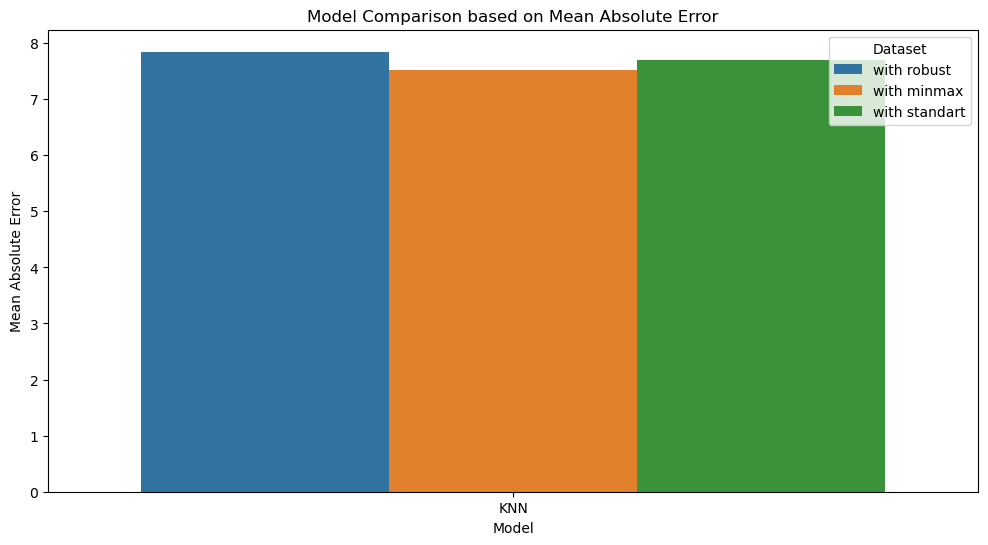

In [61]:
# draw a graph to compare the models based on mean absolute error
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="model", y="MAE", hue="dataset")
plt.title("Model Comparison based on Mean Absolute Error")
plt.ylabel("Mean Absolute Error")
plt.xlabel("Model")
plt.legend(title="Dataset")
plt.show()

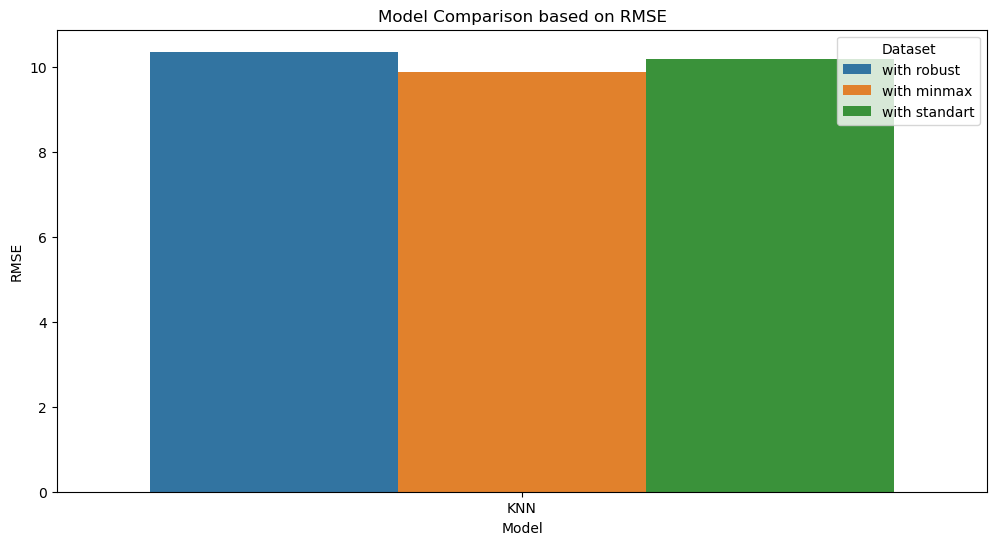

In [62]:
# draw graphs to compare the models based on RMSE
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars=["model", "dataset"], value_vars=["RMSE"]), x="model", y="value", hue="dataset")
plt.title("Model Comparison based on RMSE")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.legend(title="Dataset")
plt.show()